## Notebook 2 - EDA (Conducted on New Data)

In [3]:
import sys
print(sys.version)
print(spark.version)

3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]
3.1.3


In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [4]:
#pip install -U regex

In [6]:
pd.set_option("max_colwidth", 100)

In [7]:
from google.cloud import storage
# !pip install gcsfs --upgrade

### Setting Up Helper Functions

In [8]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

### Accessing Filtered Database

In [7]:
twitter_df2= spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/kshitijm/Final_Project-FiltData1')

23/03/04 15:31:29 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [8]:
twitter_df2.count()

36344266

In [9]:
twitter_df2.limit(15)

coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_text,reply_count,retweet_count,retweeted,retweeted_from,retweeted_status,source,text,timestamp_ms,truncated,tweet_text,user,withheld_in_countries,stripped
null,Thu Jun 02 22:54:...,"[0, 140]","{[], null, [], [{...",null,"{[0, 279], {[], [...",0,false,low,null,1532495852094345235,1532495852094345235,MissRodeoUSA,null,null,449378752,449378752,false,en,null,false,0,null,null,null,null,null,0,0,,null,null,"<a href=""https://...",@MissRodeoUSA We ...,1654210458192,true,@missrodeousa we ...,"{false, Fri Oct 0...",null,@missrodeousa we ...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495853709152263,1532495853709152263,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,lefthandedhater,"{null, Thu Jun 02...","<a href=""http://t...",RT @lefthandedhat...,1654210458577,false,we need more medi...,"{false, Fri Jan 0...",null,we need more medi...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495854916890625,1532495854916890625,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,GeoffRBennett,"{null, Thu Jun 02...","<a href=""https://...",RT @GeoffRBennett...,1654210458865,false,a dying uvalde te...,"{false, Tue Oct 2...",null,a dying uvalde te...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495855797903360,1532495855797903360,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,briantylercohen,"{null, Thu Jun 02...","<a href=""http://t...",RT @briantylercoh...,1654210459075,false,a hospital. a hig...,"{false, Mon Dec 0...",null,a hospital a high...
null,Thu Jun 02 22:54:...,"[35, 140]","{[], null, [], [{...",null,"{[35, 171], {[], ...",0,false,low,null,1532495857978953739,1532495857978953739,PingPin10549633,1532459409061707776,1532459409061707776,1485986160904126475,1485986160904126475,false,en,null,null,0,null,null,null,null,null,0,0,,CNBC @CNBCMakeIt ...,null,"<a href=""http://t...",@PingPin10549633 ...,1654210459595,true,@pingpin10549633 ...,"{false, Sat Nov 2...",null,@pingpin10549633 ...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495860445204498,1532495860445204498,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,lefthandedhater,"{null, Thu Jun 02...","<a href=""http://t...",RT @lefthandedhat...,1654210460183,false,we need more medi...,"{false, Fri Feb 0...",null,we need more medi...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495860495433733,1532495860495433733,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,InsiderPhD,"{null, Wed Jun 01...","<a href=""http://t...",RT @InsiderPhD: H...,1654210460195,false,happy summer (or ...,"{false, Thu Jan 0...",null,happy summer (or ...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495861175013387,1532495861175013387,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,ColArchon,"{null, Thu Jun 02...","<a href=""http://t...",RT @ColArchon: Wh...,1654210460357,false,who else's kids a...,"{false, Mon Sep 0...",null,who else's kids a...
null,Thu Jun 02 22:54:...,null,"{[], null, [], []...",null,null,0,false,low,null,1532495861586055185,1532495861586055185,null,null,null,null,null,false,en,null,null,0,null,null,null,null,null,0,0,RT,OccupyDemocrats,"{null, Wed Jun 01...","<a href=""http://t...",RT @OccupyDemocra...,1654210460455,false,breaking news: pr...,"{false, Wed Jul 1...",null,breaking news: pr...
null,Thu Jun 02 2

In [10]:
twitter_df2.columns

['coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_text',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_from',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'tweet_text',
 'user',
 'withheld_in_countries',
 'stripped']

In [11]:
twitter_df2.describe()

summary,created_at,favorite_count,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,quote_count,quoted_status_id,quoted_status_id_str,quoted_text,reply_count,retweet_count,retweeted,retweeted_from,source,text,timestamp_ms,tweet_text,stripped
count,36344266,36344266,36344266,36344266,36344266,6115849,5935724,5935724,6115849,6115849,36344266,36344266,3108759,3108759,3103464,36344266,36344266,36344266,27590556,36344266,36344266,36344266,36344266,36344266
mean,null,0.0,null,1.564201240208670...,1.564201240208670...,Infinity,1.564556480616506...,1.564556480616506...,6.061128243942732...,6.061128243942732...,null,0.0,1.555501603686509...,1.555501603686509...,3.399012464347826E8,0.0,0.0,null,Infinity,null,null,1.661769611776080...,null,null
stddev,null,0.0,null,3.197904715856612...,3.197904715856612...,NaN,3.802542852408664E16,3.802542852408664E16,6.467243087391001...,6.467243087391001...,null,0.0,8.161512158900228...,8.161512158900228...,1.6301062216690025E9,0.0,0.0,null,NaN,null,null,7.624398984556329E9,null,null
min,Fri Apr 08 00:00:...,0,low,1511197336059342854,1511197336059342854,0,18984851,1000029495213084673,12,1000002795213385734,en,0,20,100,,0,0,,,"<a href=""HTTP://b...",! Indoctrination ...,1649132496262,"! no mage today,...",high schoo...
max,Wed Sep 28 23:59:...,0,low,1623308317287149569,1623308317287149569,zzzzzzzzzzzzay,1623307516154093568,999953412291735552,1623253944557355008,999999616279089152,en,0,1623302761654755328,999816575799713792,󠇰 󠇰 󠇰 󠇰 Exac...,0,0,RT,🕳️ is coming to...,"<a href=""https://...",󠇰 󠇰 󠇰 󠇰 󠇰 ...,1675861837108,󠇰 󠇰 󠇰 󠇰 󠇰 ...,󠇰 󠇰 󠇰 󠇰 󠇰 ...


### Calculate the number of nulls in each column of the spark dataframe

In [ ]:
twitter_df2.select([count(when(isnull(c), c)).alias(c) for c in twitter_df2.columns]).toPandas().transpose()

,0
coordinates,36302779
created_at,0
display_text_range,29213648
entities,0
extended_entities,34575288
extended_tweet,28400538
favorite_count,0
favorited,0
filter_level,0
geo,36302779


In [14]:
twitter_df2.select('retweeted').groupby('retweeted').count().show()

+---------+--------+
|retweeted|   count|
+---------+--------+
|         |11736498|
|       RT|24607768|
+---------+--------+



In [ ]:
# twitter_df2.select('favorited').groupby('favorited').count().show()

# If tweets have been favorited by the authenticating user

In [ ]:
# twitter_df2.select('truncated').groupby('truncated').count().show()

# Older tweets were allowed to be truncated, but would be false for recent onles

In [ ]:
# twitter_df2.select('possibly_sensitive').groupby('possibly_sensitive').count().show()


In [ ]:
# twitter_df2.select('withheld_in_countries').groupby('withheld_in_countries').count().show()

# Most tweets are not withheld in any countries

In [ ]:
# twitter_df2.select('filter_level').groupby('filter_level').count().show()

# All tweets are at a low level filter, can remove this variable

### We can identify 4 types of tweets

- Text Tweets
- Retweets
- Quotes (retweets with personal thought)
- Replys to other tweets


### Selecting important columns

In [9]:
twitter_df2.createOrReplaceTempView("twitter_df2")

In [10]:
query = '''select
id,
created_at,
text,
tweet_text,

coordinates.coordinates as tweet_coordinates,

place.country as tweet_country,
place.country_code as tweet_country_code,
place.full_name as tweet_place_full_name,
place.place_type as tweet_place_type,


(CASE WHEN in_reply_to_status_id IS NULL THEN FALSE ELSE TRUE END) as is_reply,
is_quote_status as is_quote,
retweeted as is_retweeted,

reply_count,
quote_count,
retweet_count,
favorite_count,

in_reply_to_status_id as rp_original_id,
in_reply_to_user_id as rp_user_id,
in_reply_to_screen_name as rp_original_user,

quoted_status_id as qu_original_id,

retweeted_status.id as rt_original_id,
retweeted_status.user.screen_name as rt_original_user,

user.id as account_id,
user.screen_name as account_name,
user.description as account_description,
user.location as account_location,
user.verified as is_verified,
user.followers_count as total_followers,
user.friends_count as total_friends,
user.listed_count as total_listed,
user.favourites_count as total_favourites,
user.statuses_count as total_tweets,
user.created_at as account_created_at,
user.profile_image_url_https as account_profile_picture,

entities.hashtags.text as hashtags
FROM twitter_df2'''

twitter_df3 = spark.sql(query)

In [11]:
twitter_df3 = twitter_df3.\
withColumn('tweet_type',\
           when(col("is_retweeted") == 'RT', "retweet").\
           when(col("is_quote") == 'true', "quote").\
           when(col("is_reply") == 'true', "reply").\
           otherwise("original_tweet"))

In [12]:
twitter_df3.limit(15)

id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type
1574680103166025728,Tue Sep 27 08:39:...,RT @AfghanHenry: ...,afghan women dese...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574656924527861763,AfghanHenry,1497627495084007429,Broken_Rules420,You can not unite...,Afghanistan,false,22554,221,0,12489,5590,Sat Feb 26 17:40:...,https://pbs.twimg...,[],retweet
1574680104189693953,Tue Sep 27 08:39:...,@Jordan090102 @Co...,@jordan090102 @co...,null,null,null,null,null,true,false,,0,0,0,0,1574431663353896962,1129874873617145857,Jordan090102,null,null,null,462728812,bkrayder,#RaiderNation ONL...,null,false,961,3962,7,57575,32490,Fri Jan 13 08:41:...,https://pbs.twimg...,[],reply
1574680105389101057,Tue Sep 27 08:39:...,@jasonintrator Th...,@jasonintrator th...,null,null,null,null,null,true,false,,0,0,0,0,1574183535602274304,1726682706,jasonintrator,null,null,null,1545831866200104961,StanleyKafka,If you have any c...,null,false,5,85,0,531,566,Sat Jul 09 18:07:...,https://pbs.twimg...,[],reply
1574680106026799109,Tue Sep 27 08:39:...,@hindatuuu The Ro...,@hindatuuu the ro...,null,null,null,null,null,true,false,,0,0,0,0,1574499485069328390,1381919129729429506,hindatuuu,null,null,null,1074782789713752064,umar_alfaruqiy,I might be more t...,"Katsina, Nigeria",false,1743,1715,0,16132,7868,Mon Dec 17 21:46:...,https://pbs.twimg...,[],reply
1574680112443916289,Tue Sep 27 08:39:...,RT @Winxx_777: Wa...,was talking to a ...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574670434804633600,Winxx_777,1374080552136028160,bakang_m_,Evangelist 🇧🇼 ?...,null,false,344,231,0,83568,5680,Mon Mar 22 19:28:...,https://pbs.twimg...,[],retweet
1574680115300163585,Tue Sep 27 08:39:...,"Careers Advisor, ...","careers advisor, ...",null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,226115976,shsrbk,We are a confiden...,Kingston Upon Thames,false,2485,2119,41,9137,10023,Mon Dec 13 10:36:...,https://pbs.twimg...,[],original_tweet
1574680126880620544,Tue Sep 27 08:39:...,RT @m_a_salloum: ...,this is the case ...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574679159493824513,m_a_salloum,1262097464,valeriemhughes,null,Ireland,false,1211,1725,37,22638,37505,Tue Mar 12 14:22:...,https://pbs.twimg...,"[camps, schools]",retweet
1574680136670216193,Tue Sep 27 08:39:...,RT @Not_Tolulope:...,some rappers nowa...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574671439721943040,Not_Tolulope,1172937897181421569,Mideefe,18| Ads & PR | vi...,Dm for promotions,false,12654,8142,4,192352,111390,Sat Sep 14 18:19:...,https://pbs.twimg...,[],retweet
1574680137563512832,Tue Sep 27 08:39:...,RT @Wenahjrn: Eit...,either you pursue...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574656115257888768,Wenahjrn,766727349220077568,dallasvenn,My friends call m...,"Abuja, Nigeria",false,7348,6870,3,176341,110746,Fri Aug 19 20:03:...,https://pbs.twimg...,[],retweet
1574680137332936706,Tue Sep 27 08:39:...,Secular schools l...,secular schools l...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1482665306,Tham4066,null,null,false,31,73,0,0,48431,Tue Jun 04 16:17:...,https://abs.twimg...,[],original_tweet


#### Different types of tweets

In [13]:
num_tweets=twitter_df3.select('tweet_type').groupby('tweet_type').count().toPandas()

In [14]:
num_tweets

,tweet_type,count
0,retweet,24607768
1,reply,5900188
2,quote,988261
3,original_tweet,4848049


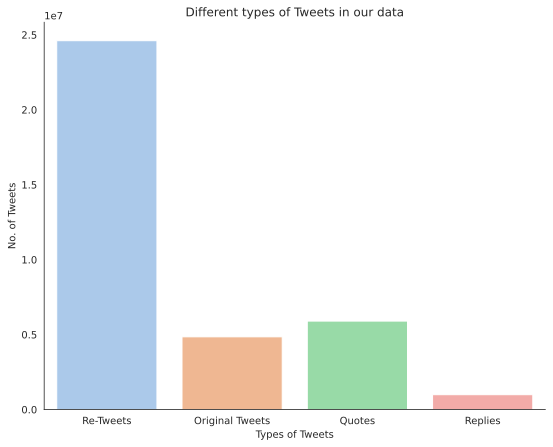

In [15]:
sns.set_style("white")

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
#sns.barplot(x='tweet_type',data=num_tweets, ax=axes, palette='pastel',order=num_tweets['count'].value_counts().index)

sns.barplot(x="tweet_type", y="count", data=num_tweets, palette="pastel", order=num_tweets["tweet_type"].value_counts().index)

x_labels = ['Re-Tweets','Original Tweets','Quotes','Replies']
axes.set_xticklabels(x_labels)

plt.title('Different types of Tweets in our data')
plt.xlabel('Types of Tweets')
plt.ylabel('No. of Tweets')

sns.despine()
plt.show()


In [22]:
tweets_accounts=twitter_df3.select('account_name').groupby('account_name').count().orderBy('count',ascending=False).show()

+---------------+-----+
|   account_name|count|
+---------------+-----+
|   NJSchoolJobs|10124|
| education_24x7| 8302|
|     iskolworks| 7283|
| jc_james_clark| 6356|
| LoveLiveFrames| 5723|
|       Porxlek1| 5595|
|   studyinnaija| 5152|
|   educationbnb| 5036|
|NorthEastJobsUK| 4563|
|       group_kq| 4250|
|     techysaavy| 4049|
| chuokikuukenya| 3385|
| ParentSecurity| 3338|
|      poet_this| 3024|
| DeAngelisCorey| 2887|
|        poskeos| 2874|
|  DennisStemmle| 2676|
|      zzz_hamed| 2626|
|       exobaebi| 2619|
|     NewsblazeK| 2535|
+---------------+-----+
only showing top 20 rows



### Writing this data

In [ ]:
# twitter_df3.write.format("parquet").\
# mode('overwrite').\
# save('gs://' + 'msca-bdp-students-bucket/shared_data/kshitijm' + '/Final_Project-FiltData3_New')

In [24]:
twitter_df3.write.format("parquet").\
mode('overwrite').\
save('gs://' + 'msca-bdp-students-bucket/shared_data/kshitijm' + '/Final_Project-FiltData2')

In [16]:
## Remove rows which have jobs, bots in it

dict_rm_job= ["employ","employer","hiring","job","jobs","roles","salary","negotiate","negotiable","401K","qualifications","interpersonal",
           "educator","part time","full time","contract","subcontract","recruit","recruitment","pay","position","employee","hired","hiring manager",
           "replacement","substitute"]

dict_rm2='|'.join(["(" + c +")" for c in dict_rm_job])
dict_rm2

'(employ)|(employer)|(hiring)|(job)|(jobs)|(roles)|(salary)|(negotiate)|(negotiable)|(401K)|(qualifications)|(interpersonal)|(educator)|(part time)|(full time)|(contract)|(subcontract)|(recruit)|(recruitment)|(pay)|(position)|(employee)|(hired)|(hiring manager)|(replacement)|(substitute)'

In [17]:
dict_rm_bots = ["bots",'bot','robot','automated','automatic','telnet','downloader','updater','api',
               'seo','search engine','optimization']

dict_rm3='|'.join(["(" + c +")" for c in dict_rm_bots])
dict_rm3

'(bots)|(bot)|(robot)|(automated)|(automatic)|(telnet)|(downloader)|(updater)|(api)|(seo)|(search engine)|(optimization)'

In [18]:
twitter_df4 = twitter_df3.where(~twitter_df3['tweet_text'].rlike(dict_rm2))
twitter_df4 = twitter_df4.where(~twitter_df4['account_description'].rlike(dict_rm3))
twitter_df4.count()

27102994

In [33]:
twitter_df4.limit(10)

id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type
1574680103166025728,Tue Sep 27 08:39:...,RT @AfghanHenry: ...,afghan women dese...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574656924527861763,AfghanHenry,1497627495084007429,Broken_Rules420,You can not unite...,Afghanistan,false,22554,221,0,12489,5590,Sat Feb 26 17:40:...,https://pbs.twimg...,[],retweet
1574680104189693953,Tue Sep 27 08:39:...,@Jordan090102 @Co...,@jordan090102 @co...,null,null,null,null,null,true,false,,0,0,0,0,1574431663353896962,1129874873617145857,Jordan090102,null,null,null,462728812,bkrayder,#RaiderNation ONL...,null,false,961,3962,7,57575,32490,Fri Jan 13 08:41:...,https://pbs.twimg...,[],reply
1574680105389101057,Tue Sep 27 08:39:...,@jasonintrator Th...,@jasonintrator th...,null,null,null,null,null,true,false,,0,0,0,0,1574183535602274304,1726682706,jasonintrator,null,null,null,1545831866200104961,StanleyKafka,If you have any c...,null,false,5,85,0,531,566,Sat Jul 09 18:07:...,https://pbs.twimg...,[],reply
1574680106026799109,Tue Sep 27 08:39:...,@hindatuuu The Ro...,@hindatuuu the ro...,null,null,null,null,null,true,false,,0,0,0,0,1574499485069328390,1381919129729429506,hindatuuu,null,null,null,1074782789713752064,umar_alfaruqiy,I might be more t...,"Katsina, Nigeria",false,1743,1715,0,16132,7868,Mon Dec 17 21:46:...,https://pbs.twimg...,[],reply
1574680112443916289,Tue Sep 27 08:39:...,RT @Winxx_777: Wa...,was talking to a ...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574670434804633600,Winxx_777,1374080552136028160,bakang_m_,Evangelist 🇧🇼 ?...,null,false,344,231,0,83568,5680,Mon Mar 22 19:28:...,https://pbs.twimg...,[],retweet
1574680115300163585,Tue Sep 27 08:39:...,"Careers Advisor, ...","careers advisor, ...",null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,226115976,shsrbk,We are a confiden...,Kingston Upon Thames,false,2485,2119,41,9137,10023,Mon Dec 13 10:36:...,https://pbs.twimg...,[],original_tweet
1574680136670216193,Tue Sep 27 08:39:...,RT @Not_Tolulope:...,some rappers nowa...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574671439721943040,Not_Tolulope,1172937897181421569,Mideefe,18| Ads & PR | vi...,Dm for promotions,false,12654,8142,4,192352,111390,Sat Sep 14 18:19:...,https://pbs.twimg...,[],retweet
1574680137563512832,Tue Sep 27 08:39:...,RT @Wenahjrn: Eit...,either you pursue...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574656115257888768,Wenahjrn,766727349220077568,dallasvenn,My friends call m...,"Abuja, Nigeria",false,7348,6870,3,176341,110746,Fri Aug 19 20:03:...,https://pbs.twimg...,[],retweet
1574680141363646466,Tue Sep 27 08:39:...,The Talent show w...,the talent show w...,null,null,null,null,null,false,false,,0,0,0,0,null,null,null,null,null,null,1088737524166651904,INFOFranschhoek,Iinfo Franschhoek...,Franschhoek,false,62,121,0,0,328,Fri Jan 25 09:57:...,https://pbs.twimg...,[],original_tweet
1574680142621851648,Tue Sep 27 08:39:...,RT @kimberbabyluv...,no job i applied ...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1574674962513686528,kimberbabyluv,1169000440610086912,AnthoniaLawson,Your Go-to plug f...,"Lagos, Nigeria",false,2359,2256,5,36136,39702,Tue Sep 03 21:33:...,https://pbs.twimg...,[],retweet


In [38]:
tweets_accounts=twitter_df4.select('account_name').groupby('account_name').count().orderBy('count',ascending=False).show()

23/03/03 16:33:51 WARN org.apache.spark.deploy.yarn.YarnAllocator: Container from a bad node: container_1677847511085_0006_01_000138 on host: hub-msca-bdp-dphub-students-kshitijm-sw-bbzf.c.msca-bdp-students.internal. Exit status: 143. Diagnostics: [2023-03-03 16:33:51.469]Container killed on request. Exit code is 143
[2023-03-03 16:33:51.483]Container exited with a non-zero exit code 143. 
[2023-03-03 16:33:51.483]Killed by external signal
.
23/03/03 16:33:51 WARN org.apache.spark.deploy.yarn.YarnAllocator: Container from a bad node: container_1677847511085_0006_01_000150 on host: hub-msca-bdp-dphub-students-kshitijm-sw-bbzf.c.msca-bdp-students.internal. Exit status: 143. Diagnostics: [2023-03-03 16:33:51.469]Container killed on request. Exit code is 143
[2023-03-03 16:33:51.469]Container exited with a non-zero exit code 143. 
[2023-03-03 16:33:51.482]Killed by external signal
.
23/03/03 16:33:51 WARN org.apache.spark.deploy.yarn.YarnAllocator: Cannot find executorId for container: con

+--------------+-----+
|  account_name|count|
+--------------+-----+
|education_24x7| 6730|
|LoveLiveFrames| 5721|
|      Porxlek1| 5595|
|jc_james_clark| 5543|
|  studyinnaija| 5149|
|      group_kq| 4092|
|  educationbnb| 4079|
|    techysaavy| 3909|
|chuokikuukenya| 3377|
|ParentSecurity| 3205|
|       poskeos| 2846|
| DennisStemmle| 2676|
|DeAngelisCorey| 2639|
|     zzz_hamed| 2625|
|      exobaebi| 2619|
|  imbatman2018| 2527|
|  dealsoftakis| 2475|
|      Tsrha_Kw| 2457|
|       Arm_PHN| 2452|
|    NewsblazeK| 2434|
+--------------+-----+
only showing top 20 rows



In [19]:
twitter_df4.write.format("parquet").\
mode('overwrite').\
save('gs://' + 'msca-bdp-students-bucket/shared_data/kshitijm' + '/Final_Project-FiltData3')

### Adding graphs for slides

In [1]:
twitter_df3= spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/kshitijm/Final_Project-FiltData3')

In [9]:
twitter_df3.limit(10)

23/03/09 22:01:32 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


id,created_at,text,tweet_text,tweet_coordinates,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_reply,is_quote,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,is_verified,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,hashtags,tweet_type
1566378682318462976,Sun Sep 04 10:52:...,RT @C_A_Graham: H...,had another conve...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034383559065601,C_A_Graham,483864332,erin_gilbey,Storyteller and 1...,"Birmingham, England",false,442,601,8,15433,8431,Sun Feb 05 13:37:...,https://pbs.twimg...,[],retweet
1566378688698097664,Sun Sep 04 10:52:...,RT @Oludeewon: I ...,i hope you have s...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566165377796771840,Oludeewon,984182548791164928,Odeshiye,♎ ...So A Child M...,Ghana,false,4902,4613,3,149571,92052,Wed Apr 11 21:32:...,https://pbs.twimg...,[],retweet
1566378715709427719,Sun Sep 04 10:52:...,RT @JackPosobiec:...,breaking: @trinit...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1565431877460189189,JackPosobiec,1558859689789644800,EuroAmerican87,American by birth...,Anywhere but here...,false,6,34,1,50,89,Sun Aug 14 16:54:...,https://pbs.twimg...,[],retweet
1566378716887916546,Sun Sep 04 10:52:...,RT @amishra77: Th...,the appalling con...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566378309520596993,amishra77,1279643153474224130,Bharath12450842,One of the 900 mi...,null,false,193,502,0,6244,9146,Sun Jul 05 05:09:...,https://pbs.twimg...,[],retweet
1566378724135555072,Sun Sep 04 10:52:...,RT @imzarvinnn: S...,senior high schoo...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034947831660545,imzarvinnn,1530893925803622401,lvchdvmp,I'm counting on y...,archen's heart,false,341,458,0,11632,5624,Sun May 29 12:49:...,https://pbs.twimg...,[],retweet
1566378734529101824,Sun Sep 04 10:52:...,RT @imzarvinnn: S...,senior high schoo...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566034947831660545,imzarvinnn,1398282464854827012,doyiea_,she/her ...,null,false,1,91,0,59,621,Fri May 28 14:18:...,https://pbs.twimg...,[],retweet
1566378741508734976,Sun Sep 04 10:52:...,You can also tag ...,you can also tag ...,null,null,null,null,null,true,false,,0,0,0,0,1566378738438533120,1299666479344807937,thxteacher,null,null,null,1299666479344807937,thxteacher,Our Teachers are ...,null,false,902,69,1,325,1257,Sat Aug 29 11:13:...,https://pbs.twimg...,"[TeachersDay, Tha...",reply
1566378743710744576,Sun Sep 04 10:52:...,RT @cutedevil5934...,"""teachers play a ...",null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566366649912938498,cutedevil5934,769516988335067137,shoaibAlam28,http://Instagram....,"Jamui, India",false,85,146,0,1434,5245,Sat Aug 27 12:48:...,https://pbs.twimg...,[],retweet
1566378745539469312,Sun Sep 04 10:52:...,@jenqissante ! 🧚...,@jenqissante ! 🧚...,null,null,null,null,null,true,true,,0,0,0,0,1566373182810234882,1547185772708909056,jenqissante,1496397166339932162,null,null,1307586299893702656,PaperupPh,more than 1k+ wor...,10AM-10PM,false,520,182,2,95,820,Sun Sep 20 07:44:...,https://pbs.twimg...,[],quote
1566378750090027008,Sun Sep 04 10:52:...,RT @SethAbramson:...,like... one of hi...,null,null,null,null,null,false,false,RT,0,0,0,0,null,null,null,null,1566236400785264640,SethAbramson,1269070500082450437,ResisterNell,"Activist, #Resist...",Kentucky,false,9745,10379,16,463255,333552,Sat Jun 06 00:57:...,https://pbs.twimg...,[],retweet


In [10]:
num_tweets=twitter_df3.select('tweet_type').groupby('tweet_type').count().toPandas()

In [11]:
num_tweets

,tweet_type,count
0,retweet,18065230
1,reply,4376472
2,quote,813661
3,original_tweet,3847631


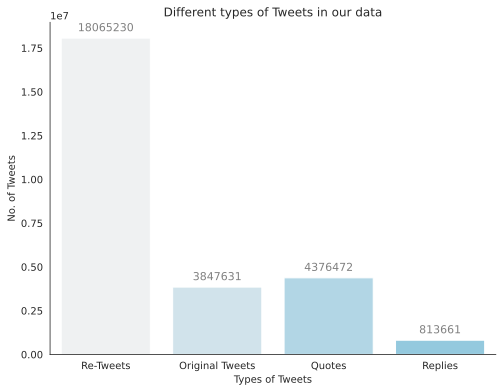

In [22]:
sns.set_style("white")
pastel_blue = sns.light_palette("skyblue", input="rgb", n_colors=4)
sns.set_palette(pastel_blue)


_, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.barplot(x="tweet_type", y="count", data=num_tweets, order=num_tweets["tweet_type"].value_counts().index)

for p in axes.patches:
    axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')


x_labels = ['Re-Tweets','Original Tweets','Quotes','Replies']
axes.set_xticklabels(x_labels)

plt.title('Different types of Tweets in our data')
plt.xlabel('Types of Tweets')
plt.ylabel('No. of Tweets')

sns.despine()
plt.show()


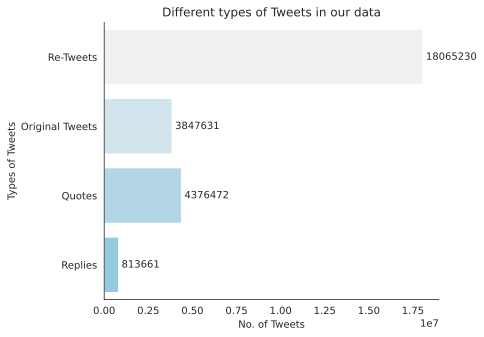

In [30]:
sns.set_style("white")
pastel_blue = sns.light_palette("skyblue", input="rgb", n_colors=4)
sns.set_palette(pastel_blue)


_, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

sns.barplot(y="tweet_type", x="count", data=num_tweets, orient='h' ,order=num_tweets["tweet_type"].value_counts().index)

# for p in axes.patches:
#     axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
#                 textcoords='offset points')

for p in axes.patches:
    width = p.get_width()
    axes.annotate('{:.0f}'.format(width), xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(3, 0), textcoords='offset points', ha='left', va='center')



y_labels = ['Re-Tweets','Original Tweets','Quotes','Replies']
axes.set_yticklabels(y_labels)

plt.title('Different types of Tweets in our data')
plt.ylabel('Types of Tweets')
plt.xlabel('No. of Tweets')

sns.despine()
plt.show()


In [31]:
twitter_df3.describe()

summary,id,created_at,text,tweet_text,tweet_country,tweet_country_code,tweet_place_full_name,tweet_place_type,is_retweeted,reply_count,quote_count,retweet_count,favorite_count,rp_original_id,rp_user_id,rp_original_user,qu_original_id,rt_original_id,rt_original_user,account_id,account_name,account_description,account_location,total_followers,total_friends,total_listed,total_favourites,total_tweets,account_created_at,account_profile_picture,tweet_type
count,27102994,27102994,27102994,27102994,233950,233950,233950,233950,27102994,27102994,27102994,27102994,27102994,4405299,4531904,4531904,2436519,18061110,18061110,27102994,27102994,27102994,18884337,27102994,27102994,27102994,27102994,27102994,27102994,27102994,27102994
mean,1.563873274165745...,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,1.564375955078438...,6.15277421369952E17,Infinity,1.555701182634171...,1.561165781131480...,Infinity,6.723812124037050...,Infinity,NaN,NaN,9138.458677295948,1780.6271475394933,53.01451858049336,54190.82665055381,51094.215287026964,null,null,null
stddev,3.198703937422317...,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,3.725229940848747...,6.467331970363066...,NaN,7.731210207574136E16,4.124832126728704E16,NaN,6.449867495230881...,NaN,NaN,NaN,279497.093644459,5951.313898424554,1054.6902220749653,103244.4261935843,115457.88731993045,null,null,null
min,1511197336445370373,Fri Apr 08 00:00:...,! Indoctrination ...,"! no mage today,...",,,1010XL Jax Sports...,admin,,0,0,0,0,1137371615,12,0,380,504545832,0000000007Y,22,00000000,!,China,0,0,0,0,1,Fri Apr 01 00:00:...,https://abs.twimg...,original_tweet
max,1623308317287149569,Wed Sep 28 23:59:...,󠀠󠀠 ?...,󠀠󠀠 ?...,대한민국,ZW, Ascot Internati...,poi,RT,0,0,0,0,1623307516154093568,1623227858436108289,zzzzzzzzzzzzay,1623302761654755328,1623307773202006019,zzzztsz,1623305168291864577,zzzzzzzzzzzzzfm,󾓪 // ☭ //🏺,󰟷yeh.shaa_ 39sak...,108899882,4131219,217883,3470796,9704446,Wed Sep 30 23:59:...,https://pbs.twimg...,retweet


In [32]:
twitter_df3.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,27102994,1.5638732741657449E18,3.1987039374223184E16,1511197336445370373,1623308317287149569
created_at,27102994,None,None,Fri Apr 08 00:00:00 +0000 2022,Wed Sep 28 23:59:59 +0000 2022
text,27102994,None,None,!\nIndoctrination Dept.\n\nAnd Don't Tell the Parents!\n\nThe pronoun nonsense is just the tip ...,󠀠󠀠\n\n 𝐋𝐄𝐄 is a 37 year old former history professor —- Currently Clementine’s professi...
tweet_text,27102994,None,None,"!\n\nno mage today, she is busy at \nschool . as for what the school\nis teaching her . . . \n\n...",󠀠󠀠\n\n 𝐋𝐄𝐄 is a 37 year old former history professor —- currently clementine’s professi...
tweet_country,233950,None,None,,대한민국
tweet_country_code,233950,None,None,,ZW
tweet_place_full_name,233950,None,None,1010XL Jax Sports Radio, Ascot International School
tweet_place_type,233950,None,None,admin,poi
is_retweeted,27102994,None,None,,RT
